In [1]:
import importlib
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns


import utils

importlib.reload(utils)

<module 'utils' from '/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_01_01/utils.py'>

## データ読み込み

In [2]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[3].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

IMAGE_NAMES = ["image_t.png", "image_t-0.5.png", "image_t-1.0.png"]

In [3]:
tr_df = utils.read_feature_csv(TR_FEATURES_CSV)
tr_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320"""
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420"""


In [4]:
ts_df = utils.read_feature_csv(TS_FEATURES_CSV)
ts_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,str,str
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""120"""
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""220"""


In [5]:
tr_images = utils.load_images(
    IMAGES_DIR, ids=tr_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(tr_images.shape)
ts_images = utils.load_images(
    IMAGES_DIR, ids=ts_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(ts_images.shape)

(43371, 3, 64, 128, 3)
(1727, 3, 64, 128, 3)


In [6]:
tr_images = utils.preprocess_images(tr_images)
ts_images = utils.preprocess_images(ts_images)

print(tr_images.shape)
print(ts_images.shape)

(43371, 9, 64, 128)
(1727, 9, 64, 128)


## Target

In [7]:
target = utils.CoordinateTarget(prefix="tg_")
target.fit(tr_df)

tg_df = target.transform(tr_df)
print(tg_df.columns)
print(tg_df.describe().glimpse())
tr_df = pl.concat([tr_df, tg_df], how="horizontal")

['tg_cood_x_0', 'tg_cood_y_0', 'tg_cood_z_0', 'tg_cood_x_1', 'tg_cood_y_1', 'tg_cood_z_1', 'tg_cood_x_2', 'tg_cood_y_2', 'tg_cood_z_2', 'tg_cood_x_3', 'tg_cood_y_3', 'tg_cood_z_3', 'tg_cood_x_4', 'tg_cood_y_4', 'tg_cood_z_4', 'tg_cood_x_5', 'tg_cood_y_5', 'tg_cood_z_5']
Rows: 9
Columns: 19
$ statistic   <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ tg_cood_x_0 <f64> 43371.0, 0.0, 4.122443942757371, 3.2667167639213908, -1.7321542071537557, 1.116530690565041, 3.843337458989432, 6.4281197924248215, 12.392587231992154
$ tg_cood_y_0 <f64> 43371.0, 0.0, 0.0019486856369589753, 0.11686590022408185, -2.5341378248203235, -0.02646308932096216, 0.0010884804706597444, 0.030664179622664968, 3.4595563267615925
$ tg_cood_z_0 <f64> 43371.0, 0.0, 0.001247332026343412, 0.040745039147660006, -0.9965478318668152, -0.017624552286421614, 0.0011112325970167394, 0.01959056385186172, 1.4479292511292303
$ tg_cood_x_1 <f64> 43371.0, 0.0, 8.694386412319787, 6.894354638218222, -3.1

## 特徴量

In [8]:
feature = utils.Feature(prefix="ft_")
feature.fit(tr_df)

ft_df = feature.transform(tr_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
tr_df = pl.concat([tr_df, ft_df], how="horizontal")

ft_df = feature.transform(ts_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
ts_df = pl.concat([ts_df, ft_df], how="horizontal")

['ft_vEgo', 'ft_aEgo', 'ft_steeringAngleDeg', 'ft_steeringTorque', 'ft_brake', 'ft_brakePressed', 'ft_gas', 'ft_gasPressed', 'ft_is_gearShifter_drive', 'ft_is_gearShifter_neutral', 'ft_is_gearShifter_park', 'ft_is_gearShifter_reverse', 'ft_leftBlinker', 'ft_rightBlinker']
Rows: 9
Columns: 15
$ statistic                 <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ ft_vEgo                   <f64> 43371.0, 0.0, 9.172175823216334, 7.226919878374694, -0.1619189828634262, 2.5786657333374023, 8.518790245056152, 14.286815643310547, 27.55126190185547
$ ft_aEgo                   <f64> 43371.0, 0.0, -0.015654028629347255, 0.6324016778486632, -4.936206340789795, -0.2363678514957428, -1.8347540436410405e-15, 0.22229795157909396, 3.1400704383850098
$ ft_steeringAngleDeg       <f64> 43371.0, 0.0, -2.065172574071012, 65.54882159006848, -481.394287109375, -3.461754322052002, -0.35647091269493103, 2.6269068717956543, 484.69171142578125
$ ft_steeringTorque         <f64>

## モデリング

In [9]:
N_SPLITS = 2

In [10]:
model_params = {
    "dnn": {
        "n_img_channels": 3 * 3,
        "n_features": len(feature.columns),
        "n_targets": len(target.columns),
        "segmentation_model_params": {
            "encoder_name": "resnet18",
            "encoder_weights": "imagenet",
            "decoder_channels": (256, 128, 64, 32, 16),
        },
    },
    "dev": "cuda",
}

lr = 1e-4
fit_params = {
    "dnn": {
        "tr_batch_size": 128,
        "vl_batch_size": 128,
        "trainer_params": {
            "criterion_params": {},
            "opt": "adamw",
            "opt_params": {"lr": lr, "weight_decay": 1e-4},
            "backbone_opt_params": {"lr": lr, "weight_decay": 1e-4},
            "sch_params": {
                "max_lr": lr,
                "pct_start": 0.1,
                "div_factor": 25,
                "final_div_factor": 1000,
            },
            "epochs": 10,
            "dev": "cuda",
            "prefix": "",
            "save_best": False,
            "save_epochs": [],
            "maximize_score": False,
            "grad_max_norm": None,
        },
    },
}

In [11]:
models, oof_preds = utils.train(
    model_params=model_params,
    fit_params=fit_params,
    df=tr_df,
    images=tr_images,
    target_cols=target.columns,
    feature_cols=feature.columns,
    group_col="scene_id",
    n_splits=N_SPLITS,
)

-----------------
-----------------
Training fold 0...
train samples: 21685, valid samples: 21686
Save model : model.pth

epoch  0
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06


100%|██████████| 170/170 [00:03<00:00, 47.87it/s]



Train Loss: 0.8257
{'loss': 0.8256669351335107, 'loss_mae': 0.8256669351335107}
Valid Loss: 0.7736
{'loss': 0.7736325365655562, 'loss_mae': 0.7736325365655562}
Update best score : 0.7736325365655562
Save model : model.pth

epoch  1
lr  9.999989334927811e-05
lr  9.999989334927811e-05
lr  9.999989334927811e-05
lr  9.999989334927811e-05


100%|██████████| 170/170 [00:03<00:00, 48.59it/s]



Train Loss: 0.7425
{'loss': 0.7425224347227424, 'loss_mae': 0.7425224347227424}
Valid Loss: 0.7108
{'loss': 0.7107561616336598, 'loss_mae': 0.7107561616336598}
Update best score : 0.7107561616336598
Save model : model.pth

epoch  2
lr  9.694933111214083e-05
lr  9.694933111214083e-05
lr  9.694933111214083e-05
lr  9.694933111214083e-05


100%|██████████| 170/170 [00:03<00:00, 49.54it/s]



Train Loss: 0.6893
{'loss': 0.689328293475879, 'loss_mae': 0.689328293475879}
Valid Loss: 0.6673
{'loss': 0.6673140843124951, 'loss_mae': 0.6673140843124951}
Update best score : 0.6673140843124951
Save model : model.pth

epoch  3
lr  8.823622787406476e-05
lr  8.823622787406476e-05
lr  8.823622787406476e-05
lr  8.823622787406476e-05


100%|██████████| 170/170 [00:03<00:00, 49.15it/s]



Train Loss: 0.6504
{'loss': 0.6503846992755077, 'loss_mae': 0.6503846992755077}
Valid Loss: 0.6454
{'loss': 0.6453909181496676, 'loss_mae': 0.6453909181496676}
Update best score : 0.6453909181496676
Save model : model.pth

epoch  4
lr  7.491151247727024e-05
lr  7.491151247727024e-05
lr  7.491151247727024e-05
lr  7.491151247727024e-05


100%|██████████| 170/170 [00:03<00:00, 48.39it/s]



Train Loss: 0.6183
{'loss': 0.6182836752671462, 'loss_mae': 0.6182836752671462}
Valid Loss: 0.6245
{'loss': 0.6245000348371618, 'loss_mae': 0.6245000348371618}
Update best score : 0.6245000348371618
Save model : model.pth

epoch  5
lr  5.858234225046598e-05
lr  5.858234225046598e-05
lr  5.858234225046598e-05
lr  5.858234225046598e-05


100%|██████████| 170/170 [00:03<00:00, 48.12it/s]



Train Loss: 0.5918
{'loss': 0.5918335667728672, 'loss_mae': 0.5918335667728672}
Valid Loss: 0.6068
{'loss': 0.6068070246892817, 'loss_mae': 0.6068070246892817}
Update best score : 0.6068070246892817
Save model : model.pth

epoch  6
lr  4.121825611589063e-05
lr  4.121825611589063e-05
lr  4.121825611589063e-05
lr  4.121825611589063e-05


100%|██████████| 170/170 [00:03<00:00, 48.70it/s]



Train Loss: 0.5737
{'loss': 0.5736659654146116, 'loss_mae': 0.5736659654146116}
Valid Loss: 0.5953
{'loss': 0.5952933774274938, 'loss_mae': 0.5952933774274938}
Update best score : 0.5952933774274938
Save model : model.pth

epoch  7
lr  2.4913619127992137e-05
lr  2.4913619127992137e-05
lr  2.4913619127992137e-05
lr  2.4913619127992137e-05


100%|██████████| 170/170 [00:03<00:00, 48.56it/s]



Train Loss: 0.5607
{'loss': 0.5607194930491363, 'loss_mae': 0.5607194930491363}
Valid Loss: 0.5922
{'loss': 0.5921985791010015, 'loss_mae': 0.5921985791010015}
Update best score : 0.5921985791010015
Save model : model.pth

epoch  8
lr  1.1635011138325142e-05
lr  1.1635011138325142e-05
lr  1.1635011138325142e-05
lr  1.1635011138325142e-05


100%|██████████| 170/170 [00:03<00:00, 48.55it/s]



Train Loss: 0.5530
{'loss': 0.5529970561964273, 'loss_mae': 0.5529970561964273}
Valid Loss: 0.5912
{'loss': 0.5912215345046099, 'loss_mae': 0.5912215345046099}
Update best score : 0.5912215345046099
Save model : model.pth

epoch  9
lr  2.9840282418258656e-06
lr  2.9840282418258656e-06
lr  2.9840282418258656e-06
lr  2.9840282418258656e-06


100%|██████████| 170/170 [00:03<00:00, 48.33it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_01_01/utils.py:862: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 0.5513
{'loss': 0.5513035672656178, 'loss_mae': 0.5513035672656178}
Valid Loss: 0.5891
{'loss': 0.5890670983230366, 'loss_mae': 0.5890670983230366}
Update best score : 0.5890670983230366
Save model : model.pth
-----------------
-----------------
Training fold 1...
train samples: 21686, valid samples: 21685
Save model : model.pth

epoch  0
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06


100%|██████████| 170/170 [00:03<00:00, 49.25it/s]



Train Loss: 0.8390
{'loss': 0.8389790163943048, 'loss_mae': 0.8389790163943048}
Valid Loss: 0.7908
{'loss': 0.7907513453679926, 'loss_mae': 0.7907513453679926}
Update best score : 0.7907513453679926
Save model : model.pth

epoch  1
lr  9.999989334927811e-05
lr  9.999989334927811e-05
lr  9.999989334927811e-05
lr  9.999989334927811e-05


100%|██████████| 170/170 [00:03<00:00, 50.41it/s]



Train Loss: 0.7494
{'loss': 0.7494499249571174, 'loss_mae': 0.7494499249571174}
Valid Loss: 0.7162
{'loss': 0.7161689214846667, 'loss_mae': 0.7161689214846667}
Update best score : 0.7161689214846667
Save model : model.pth

epoch  2
lr  9.694933111214083e-05
lr  9.694933111214083e-05
lr  9.694933111214083e-05
lr  9.694933111214083e-05


100%|██████████| 170/170 [00:03<00:00, 50.52it/s]



Train Loss: 0.6810
{'loss': 0.6810379642001271, 'loss_mae': 0.6810379642001271}
Valid Loss: 0.6527
{'loss': 0.6527060431592605, 'loss_mae': 0.6527060431592605}
Update best score : 0.6527060431592605
Save model : model.pth

epoch  3
lr  8.823622787406476e-05
lr  8.823622787406476e-05
lr  8.823622787406476e-05
lr  8.823622787406476e-05


100%|██████████| 170/170 [00:03<00:00, 50.32it/s]



Train Loss: 0.6305
{'loss': 0.6305389894536261, 'loss_mae': 0.6305389894536261}
Valid Loss: 0.6278
{'loss': 0.6277999111834695, 'loss_mae': 0.6277999111834695}
Update best score : 0.6277999111834695
Save model : model.pth

epoch  4
lr  7.491151247727024e-05
lr  7.491151247727024e-05
lr  7.491151247727024e-05
lr  7.491151247727024e-05


100%|██████████| 170/170 [00:03<00:00, 50.44it/s]



Train Loss: 0.5927
{'loss': 0.592714935717498, 'loss_mae': 0.592714935717498}
Valid Loss: 0.6141
{'loss': 0.6141245459809023, 'loss_mae': 0.6141245459809023}
Update best score : 0.6141245459809023
Save model : model.pth

epoch  5
lr  5.858234225046598e-05
lr  5.858234225046598e-05
lr  5.858234225046598e-05
lr  5.858234225046598e-05


100%|██████████| 170/170 [00:03<00:00, 49.50it/s]



Train Loss: 0.5656
{'loss': 0.5656445472550815, 'loss_mae': 0.5656445472550815}
Valid Loss: 0.5959
{'loss': 0.595902990418322, 'loss_mae': 0.595902990418322}
Update best score : 0.595902990418322
Save model : model.pth

epoch  6
lr  4.121825611589063e-05
lr  4.121825611589063e-05
lr  4.121825611589063e-05
lr  4.121825611589063e-05


100%|██████████| 170/170 [00:03<00:00, 49.89it/s]



Train Loss: 0.5446
{'loss': 0.5446077484703629, 'loss_mae': 0.5446077484703629}
Valid Loss: 0.5854
{'loss': 0.5853505804258234, 'loss_mae': 0.5853505804258234}
Update best score : 0.5853505804258234
Save model : model.pth

epoch  7
lr  2.4913619127992137e-05
lr  2.4913619127992137e-05
lr  2.4913619127992137e-05
lr  2.4913619127992137e-05


100%|██████████| 170/170 [00:03<00:00, 49.08it/s]



Train Loss: 0.5313
{'loss': 0.5312746086064175, 'loss_mae': 0.5312746086064175}
Valid Loss: 0.5752
{'loss': 0.5751844146672417, 'loss_mae': 0.5751844146672417}
Update best score : 0.5751844146672417
Save model : model.pth

epoch  8
lr  1.1635011138325142e-05
lr  1.1635011138325142e-05
lr  1.1635011138325142e-05
lr  1.1635011138325142e-05


100%|██████████| 170/170 [00:03<00:00, 49.66it/s]



Train Loss: 0.5249
{'loss': 0.5248612364721016, 'loss_mae': 0.5248612364721016}
Valid Loss: 0.5799
{'loss': 0.5798602551221848, 'loss_mae': 0.5798602551221848}
Save model : model.pth

epoch  9
lr  2.9840282418258656e-06
lr  2.9840282418258656e-06
lr  2.9840282418258656e-06
lr  2.9840282418258656e-06


100%|██████████| 170/170 [00:03<00:00, 49.37it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_01_01/utils.py:862: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 0.5236
{'loss': 0.523592492708793, 'loss_mae': 0.523592492708793}
Valid Loss: 0.5758
{'loss': 0.5758499783628127, 'loss_mae': 0.5758499783628127}
Save model : model.pth


In [12]:
oof_preds = oof_preds.select(pl.all().name.prefix("pred_"))
pred_cols = oof_preds.columns

tr_df = pl.concat([tr_df, oof_preds], how="horizontal")
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec,tg_cood_x_0,tg_cood_y_0,tg_cood_z_0,tg_cood_x_1,tg_cood_y_1,…,tg_cood_y_4,tg_cood_z_4,tg_cood_x_5,tg_cood_y_5,tg_cood_z_5,ft_vEgo,ft_aEgo,ft_steeringAngleDeg,ft_steeringTorque,ft_brake,ft_brakePressed,ft_gas,ft_gasPressed,ft_is_gearShifter_drive,ft_is_gearShifter_neutral,ft_is_gearShifter_park,ft_is_gearShifter_reverse,ft_leftBlinker,ft_rightBlinker,pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320""",2.82959,0.032226,0.045187,6.231999,0.065895,…,0.174289,0.406331,21.951269,0.199503,0.485079,5.701526,1.538456,-2.165777,-139.0,0.0,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.970983,0.003725,0.000465,6.049442,0.016103,-0.006686,10.160458,-0.032734,-0.004696,15.843302,0.009945,-0.013547,16.700735,-0.004823,0.005099,21.324902,0.038278,-0.001659
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420""",4.970268,-0.007936,0.005028,10.350489,-0.032374,…,0.843124,0.065,31.383814,1.42507,0.073083,11.176292,0.279881,-11.625697,-44.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.386062,-0.070984,-0.002824,10.275401,-0.167871,-0.001594,15.905012,-0.494787,0.036403,22.124769,-0.689891,0.022399,25.83489,-0.386192,0.036744,32.566677,-0.614657,0.034559
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,"""00066be8e20318869c38c66be46663…","""520""",4.815701,-0.000813,0.017577,10.153522,-0.0278,…,-0.576985,0.102859,30.460033,-0.841894,0.152889,10.472548,0.231099,-2.985105,-132.0,0.0,0.0,0.18,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.365213,-0.029636,-0.002498,10.458334,-0.090408,0.004986,16.079082,-0.252648,0.024743,21.234589,-0.314849,0.009633,27.305738,-0.231908,0.034686,31.730747,-0.381419,0.011907
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754,"""000fb056f97572d384bae4f5fc1e0f…","""120""",2.812608,0.033731,0.0059,5.975378,0.137848,…,0.960717,0.043479,19.311182,1.374655,0.058754,6.055565,-0.117775,7.632668,173.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.106192,0.014587,-0.001065,5.927544,0.034033,-0.00614,8.887312,0.033715,-0.000015,14.721682,0.095988,-0.021241,14.765061,0.084108,0.003922,16.402925,0.108749,0.015653
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-

## 評価

In [13]:
def calc_score(df: pl.DataFrame, pred_cols: list[str]):
    tg_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    tg = df.select(tg_cols).to_numpy()
    pred = df.select(pred_cols).to_numpy()

    scores = np.abs(tg - pred).mean(axis=0)
    scores = {f"score_{col}": float(score) for col, score in zip(pred_cols, scores)}
    scores["avg"] = float(np.abs(tg - pred).mean())
    return scores


scores = calc_score(tr_df, pred_cols)
scores

{'score_pred_tg_cood_x_0': 0.8922424552737186,
 'score_pred_tg_cood_y_0': 0.045483195528192015,
 'score_pred_tg_cood_z_0': 0.026655333139071594,
 'score_pred_tg_cood_x_1': 1.2874007618568009,
 'score_pred_tg_cood_y_1': 0.11987823320539126,
 'score_pred_tg_cood_z_1': 0.055608706560055836,
 'score_pred_tg_cood_x_2': 1.208400007510635,
 'score_pred_tg_cood_y_2': 0.2084639637705054,
 'score_pred_tg_cood_z_2': 0.08715218894140483,
 'score_pred_tg_cood_x_3': 2.7992899673598655,
 'score_pred_tg_cood_y_3': 0.37709709454132373,
 'score_pred_tg_cood_z_3': 0.11859544400841013,
 'score_pred_tg_cood_x_4': 1.7830018402251309,
 'score_pred_tg_cood_y_4': 0.5759467351163455,
 'score_pred_tg_cood_z_4': 0.15254558681042732,
 'score_pred_tg_cood_x_5': 2.369839528126107,
 'score_pred_tg_cood_y_5': 0.7889329784722192,
 'score_pred_tg_cood_z_5': 0.1880913284246617,
 'avg': 0.7269236304927926}

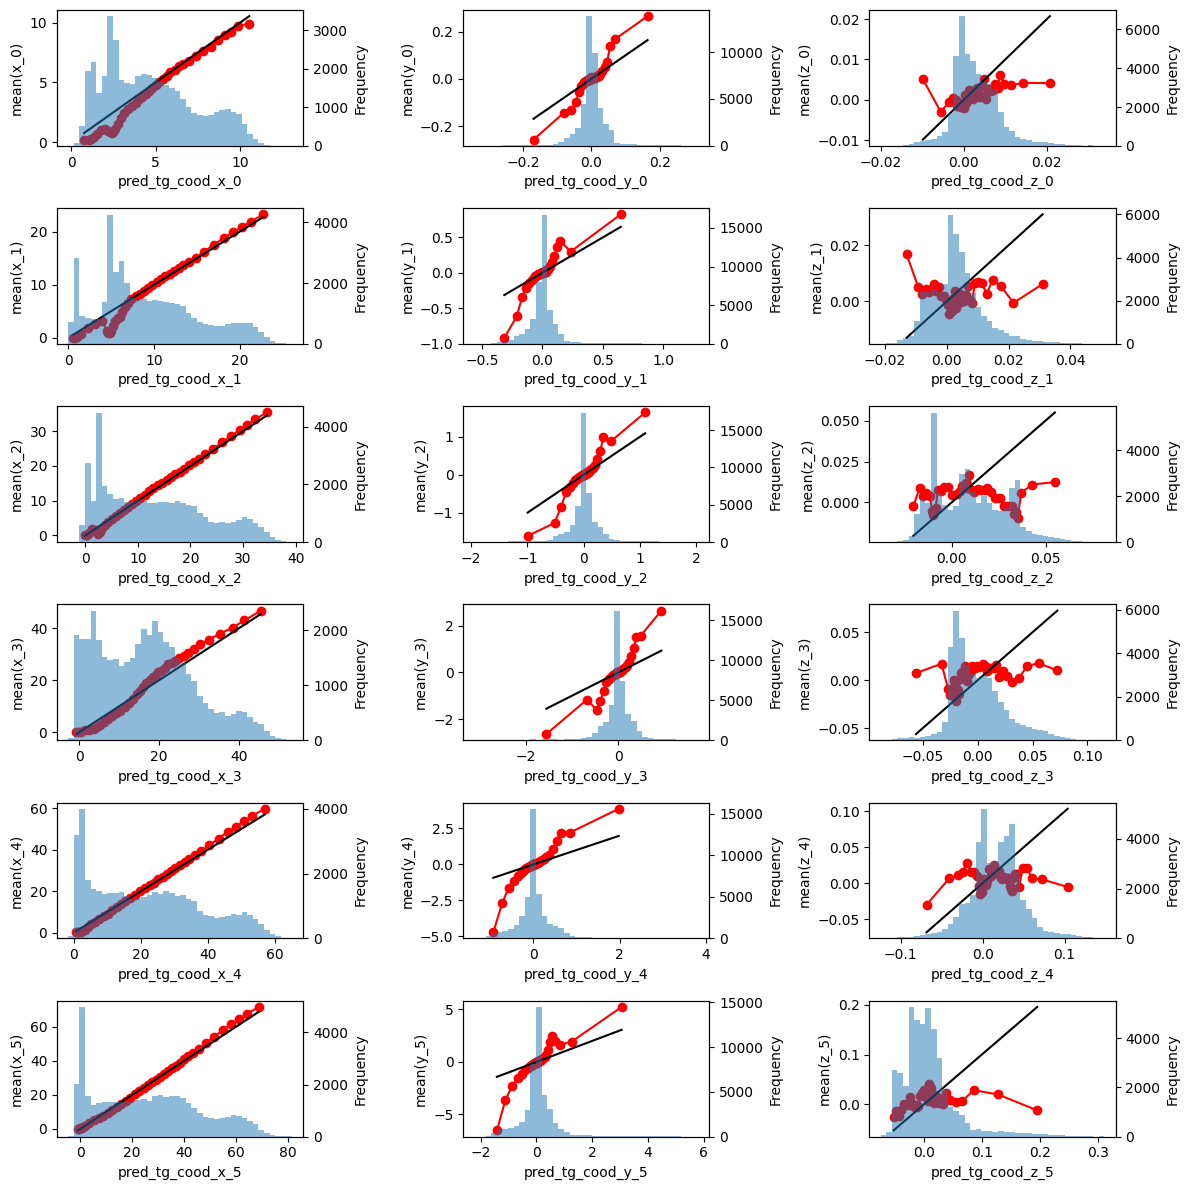

In [ ]:
utils.plot_calibration_curve(tr_df, pred_cols, n_bins=40)

## Submission

In [14]:
preds = utils.predict(models, ts_images, ts_df, feature.columns, pred_cols)
preds

pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2.365034,0.003771,0.000045,4.204665,0.01377,0.002246,4.851786,0.023633,0.008486,7.219874,0.003496,-0.022453,7.857731,0.02302,0.018262,8.124128,0.0532,-0.016237
1.001784,0.13437,-0.003098,3.577563,0.499273,-0.001703,4.92626,0.864752,0.010475,4.986607,0.729554,0.012666,7.797676,1.599296,0.017632,10.175176,2.280657,0.05496
2.310064,0.006764,-0.0003,4.862926,0.015902,0.001142,5.622622,0.033709,0.008562,9.293447,0.022717,-0.025121,9.396065,0.027979,0.018416,9.430797,0.056658,-0.009392
1.096456,0.041149,-0.00366,2.595712,0.136123,0.003358,3.803116,0.235242,0.003443,2.759816,0.157387,-0.02143,4.155744,0.424021,0.044973,2.615756,0.693438,0.023522
2.356192,-0.001583,-0.000065,3.674243,0.006481,0.00217,3.213035,-0.004444,0.010216,5.090142,-0.016982,-0.018153,4.642785,-0.016871,0.011998,4.4882,-0.020781,-0.027666
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6.345314,0.024358,0.006876,13.272993,0.066321,-0.0012,20.638174,0.159722,0.004708,28.378727,0.224084,0.019438,34.342812,0.311123,-0.026654,42.081161,0.458578,-0.006432
6.857728,-0.012685,0.003679,14.455894,-0.039518,0.012533,22.383587,-0.073809,-0.002395,26.628487,-0.090533,-0.015799,38.046227,-0.15591,0.036581,45.015869,-0.164406,0.015095
7.297735,-0.004622,0.002206,15.537039,-0.014637,0.012629,23.94194,-0.018127,-0.001961,29.638981,0.00689,-0.009585,40.382187,-0.045412,0.024547,46.79081,-0.009934,0.001395


In [15]:
def create_submission_csv(preds: pl.DataFrame, filename: str = "submission.csv"):
    submission_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    # validate preds columns
    if len(preds.columns) != len(submission_cols):
        raise ValueError(
            f"preds columns must be {len(submission_cols)}, but got {len(preds.columns)}"
        )

    preds.columns = submission_cols
    preds.write_csv(filename)
    print(f"Submission file is created: {filename}")


create_submission_csv(preds)

Submission file is created: submission.csv
